In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Dropout

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [26]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

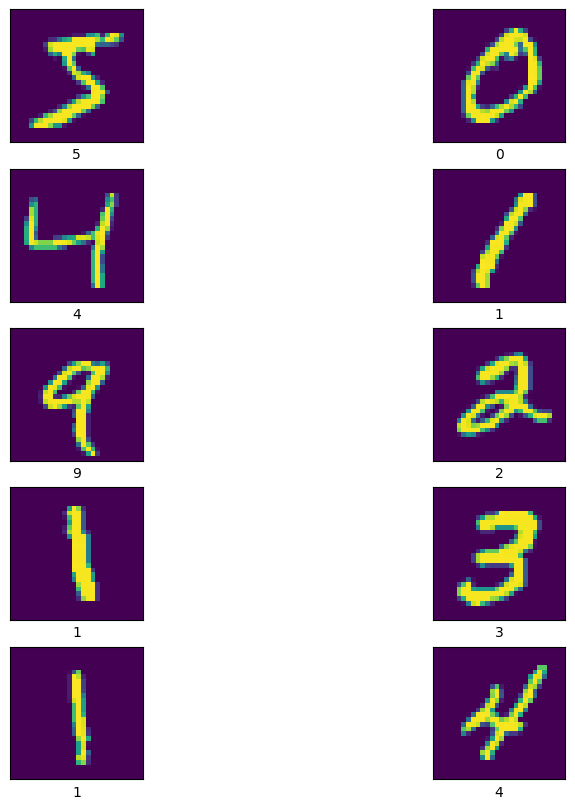

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [9]:
import numpy as np

unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_counts_per_class = dict(zip(unique_classes, class_counts))

class_counts_per_class

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_61814/2843704540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = class_labels, y = class_counts, palette='Set1')


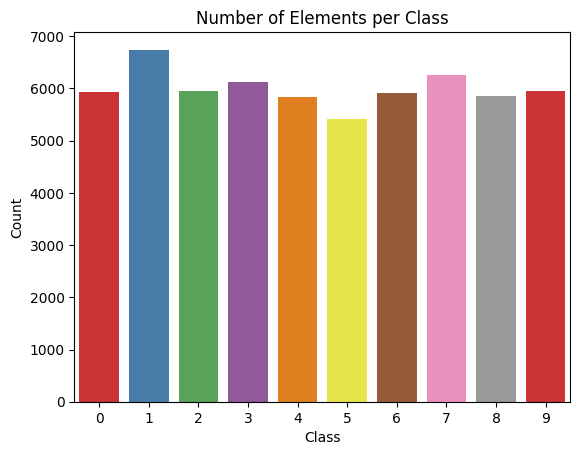

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the class labels and their corresponding counts
class_labels = list(class_counts_per_class.keys())
class_counts = list(class_counts_per_class.values())

# Plot the bar chart
sns.barplot(x = class_labels, y = class_counts, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Elements per Class')
plt.show()

In [41]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))

model.summary()

/Users/aaudric/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 128)               │    204,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
import pydot
from tensorflow.keras.utils import model_to_dot

keras.utils.model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, subgraph=False)

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9632 - loss: 0.1231 - val_accuracy: 0.9868 - val_loss: 0.0448
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9769 - loss: 0.0776 - val_accuracy: 0.9883 - val_loss: 0.0400
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9792 - loss: 0.0677 - val_accuracy: 0.9875 - val_loss: 0.0410
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9818 - loss: 0.0588 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9855 - loss: 0.0484 - val_accuracy: 0.9899 - val_loss: 0.0364
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9869 - loss: 0.0430 - val_accuracy: 0.9915 - val_loss: 0.0354
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9872 - loss: 0.0374 - val_accuracy: 0.9907 - val_loss: 0.0343
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9891 - loss: 0.0348 - val_acc

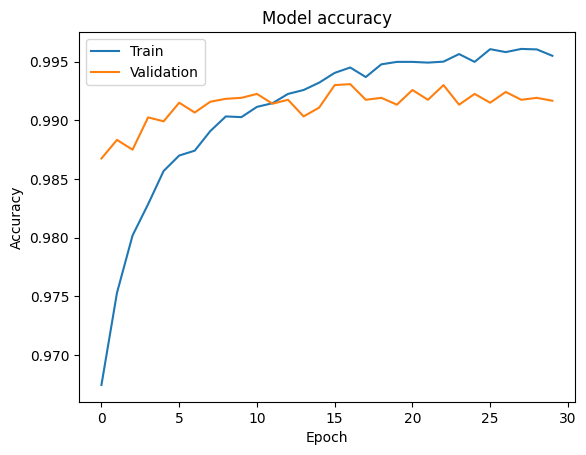

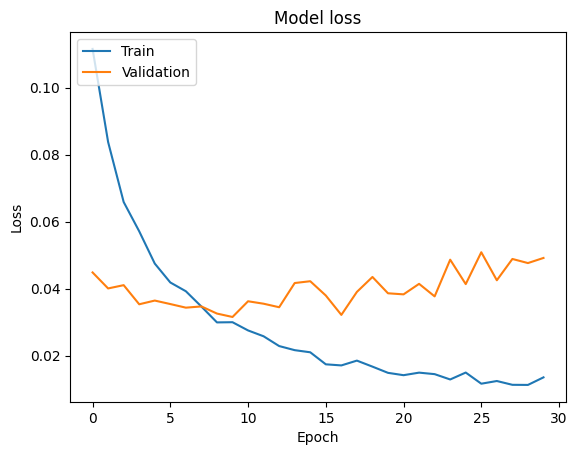

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.030290957540273666
Test accuracy: 0.9932000041007996


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


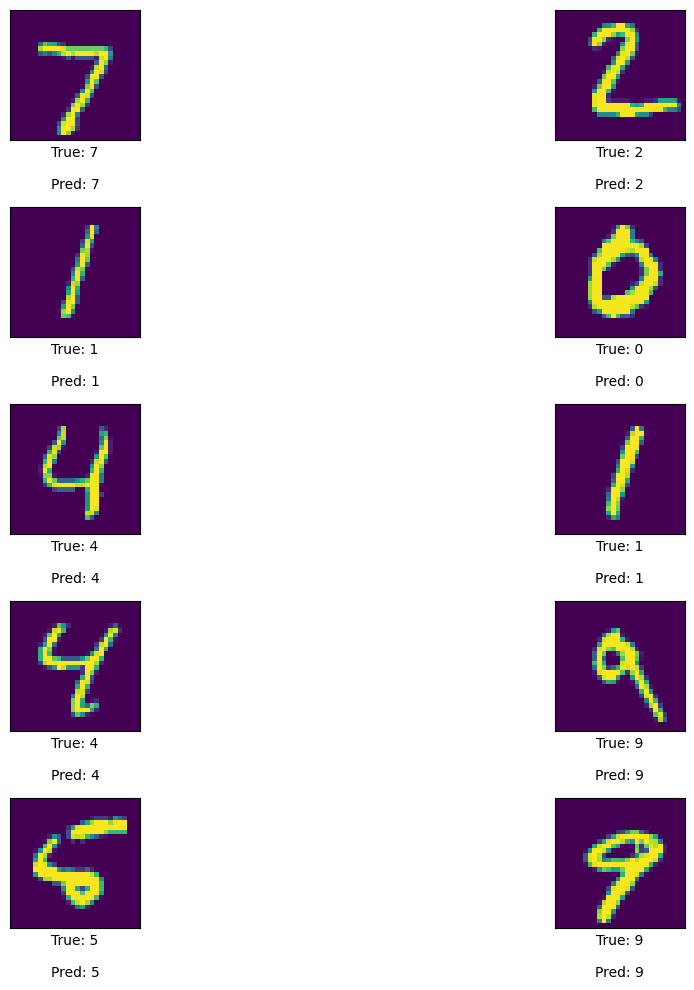

In [55]:
import matplotlib.pyplot as plt

# Get the predicted labels from the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Plot the predictions with their true values
plt.figure(figsize=(15, 10))

for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.xlabel(f"True: {y_test[i]}\n\nPred: {y_pred[i]}")

plt.tight_layout()
plt.show()

In [64]:
model.save('model.keras')